#### Import required libs

In [106]:
# import required libs
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#### Read data from .svc file

In [63]:
# read data from csv
data = pd.read_csv('./data/listingsSum.csv')

#### Show some data summeries

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12472 entries, 0 to 12471
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12472 non-null  int64  
 1   name                            12472 non-null  object 
 2   host_id                         12472 non-null  int64  
 3   host_name                       12462 non-null  object 
 4   neighbourhood_group             12472 non-null  object 
 5   neighbourhood                   12472 non-null  object 
 6   latitude                        12472 non-null  float64
 7   longitude                       12472 non-null  float64
 8   room_type                       12472 non-null  object 
 9   price                           12472 non-null  int64  
 10  minimum_nights                  12472 non-null  int64  
 11  number_of_reviews               12472 non-null  int64  
 12  last_review                     

In [67]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### Data Preprocessing
* Remove inimportant data
* Fill messing values for numerical data by median
* Fill messing values for categorical data by mode 

In [66]:
# drop unimportant data and fill nan values for numerical by median and for catigorical by mode
# data.drop(['id', 'name', 'host_id', 'host_name', 'license'], axis=1, inplace=True)
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].median())
data = data.fillna(data.mode().iloc[0].loc['last_review'])

In [68]:
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

## EDA on the Berlin Airbnb dataset

### Geographical Analysis:
- What are the most popular neighborhoods for Airbnb listings in Berlin?
- How are the prices distributed across different neighborhoods?
- Is there any correlation between the latitude/longitude and the price of listings?

In [57]:

fig = px.pie(data, names='neighbourhood_group', title='Population of neighbourhood groups')

fig.show()

The most popular neighborhood for Airbnb listings in Berlin is Mitte

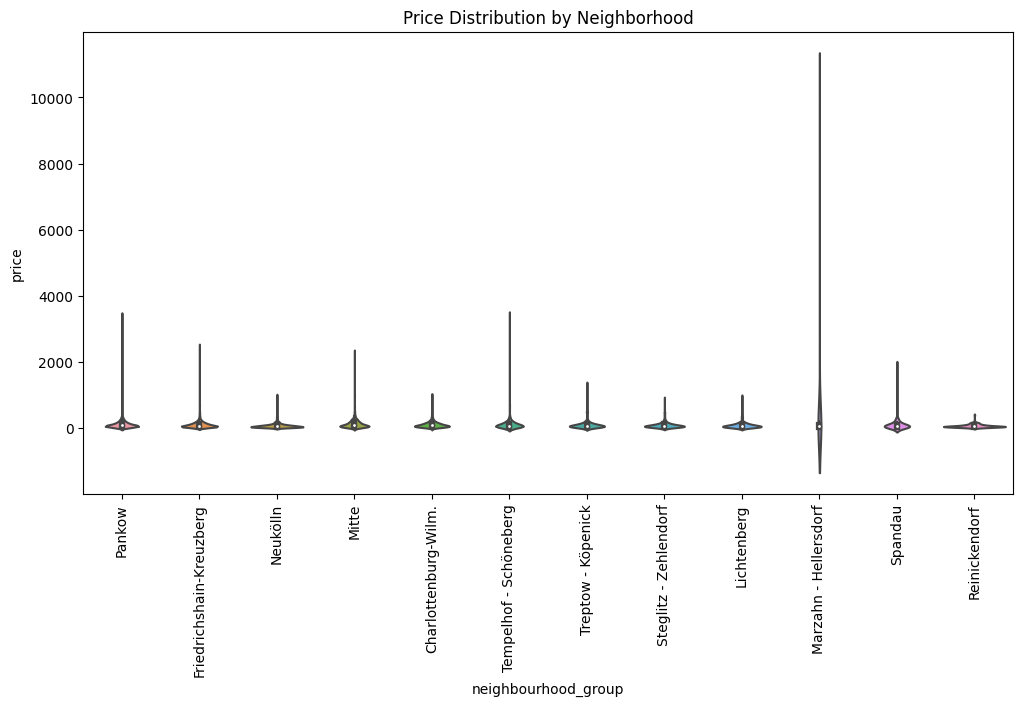

In [58]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=data)
plt.xticks(rotation=90)
plt.title('Price Distribution by Neighborhood')
plt.show()

Duo to the distribution we can see that the average price near to be the same in most of neighbourhood except in Marzahn-Hellersdorf where it hase highest outlyar

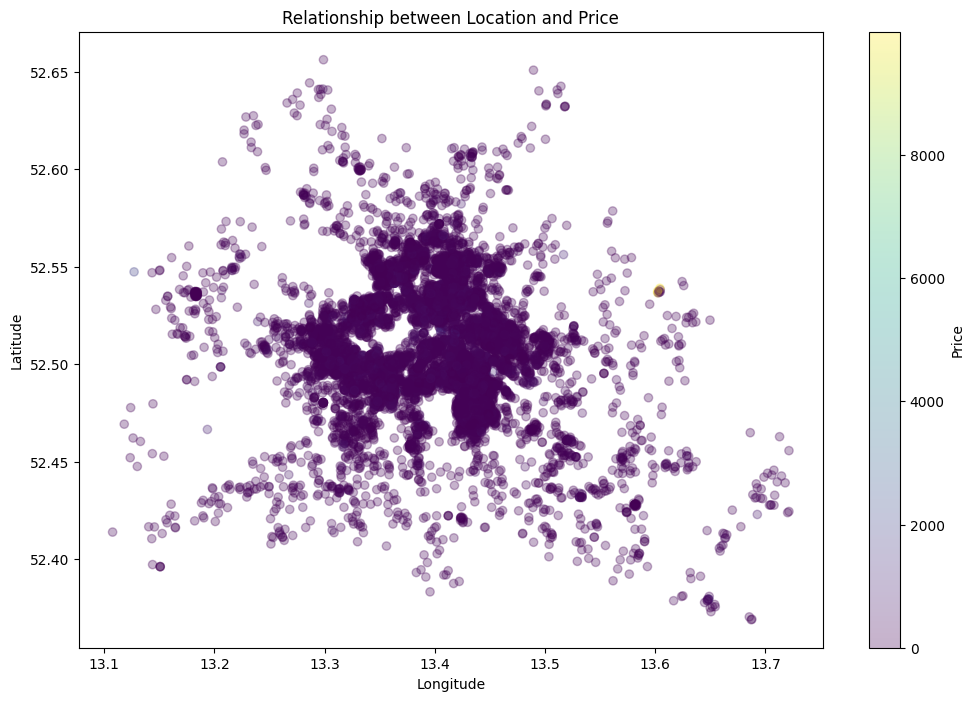

In [59]:
plt.figure(figsize=(12, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['price'], cmap='viridis', alpha=0.3)

plt.colorbar(label='Price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Relationship between Location and Price')

plt.show()

According to the graph we can see that the price is in same average in most of Berlin but we can say that the most pupulation is focased lat between (52.45, 52.55) and lon (13, 13.5)

### Pricing & Room Type Analysis:
- What is the average price of Airbnb listings in Berlin? How does it vary by room type?
- What is the most common room type in the dataset?

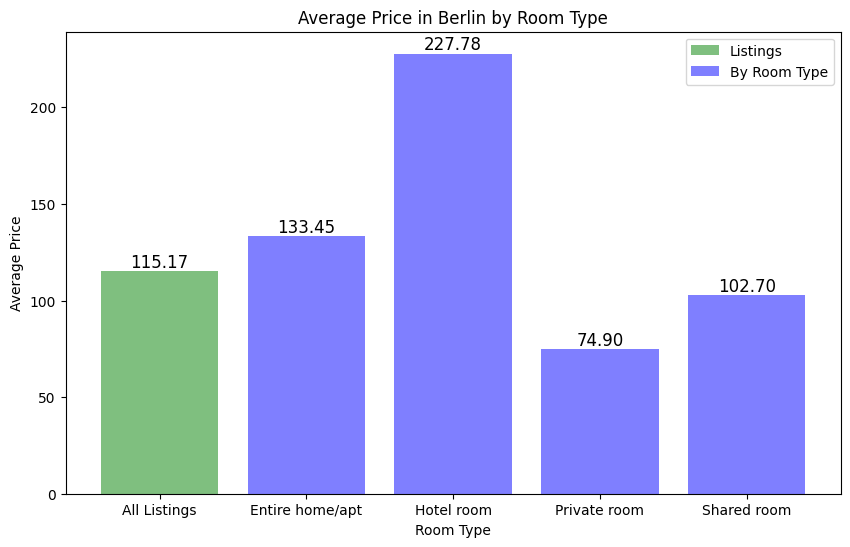

In [60]:
average_price = np.mean(data['price'])

# Calculate the average price by room type
average_price_by_room_type = data.groupby('room_type')['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar('All Listings', average_price, label='Listings', color='green', alpha=.5)
plt.bar(average_price_by_room_type.index, average_price_by_room_type, label='By Room Type', color='blue', alpha=.5)

# Add labels and title
plt.title('Average Price in Berlin by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')

# Add values above the bars
plt.text(0, average_price + 2, f'{average_price:.2f}', ha='center', fontsize=12)
for x, y in enumerate(average_price_by_room_type):
    plt.text(x + 1, y + 2, f'{y:.2f}', ha='center', fontsize=12)




# Add a legend
plt.legend()

# Show the chart
plt.show()

We can see that the average of price for room is 115.17 and the highest price is belong to hotel room type and lowest one is for private type

In [95]:
plt.figure(figsize=(10, 6))
fig = px.histogram(data_frame=data, x='room_type', title='Distribution of rooms based on type')

fig.show()

<Figure size 1000x600 with 0 Axes>

Distribution show that listing of type (entire home) is most commun type and than (private room, shared room, hotel room) are comming 

### Availability Analysis:
- what is the average days per year are listings available for booking for each type of room?

In [120]:
availability_rooms_group = data.groupby(by='room_type')['availability_365'].mean()

fig = px.pie(availability_rooms_group, names=availability_rooms_group.index , values='availability_365', title='Population of neighbourhood groups')

fig.show()

we can see that hotel rooms then shared room are highest availability during the year

## Conclusion

#### From our analysis we can say that
- most popular neighborhoods for Airbnb listings in Berlin are (Mitte, Friedrichshain)
- the sheepest type of rooms (in average) is private room
- people does not like hotels room thats maybe because its highest price